In [1]:
import numpy as np
import sqlite3 as db
import pandas as pd
from lsst.sims.utils import angularSeparation
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
# Define a point to look around
ra = 20
dec = -40

radius = 1.75
filter_colors = {'u': 'purple', 'g': 'blue', 'r': 'green', 'i': 'cyan', 'z': 'orange', 'y': 'red'}

In [3]:
filenames = ['baseline_1exp_pairsmix_10yrs.db', 'roll_mod3_sdf0.10mixed_10yrs.db', 'very_alt3_rm5illum15_10yrs.db']

baseline_1exp_pairsmix_10yrs.db 956
roll_mod3_sdf0.10mixed_10yrs.db 897
very_alt3_rm5illum15_10yrs.db 880


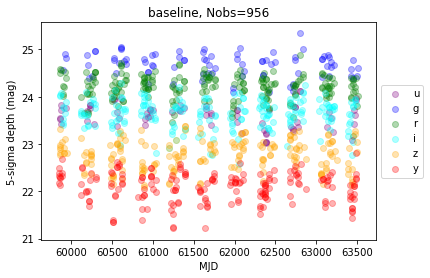

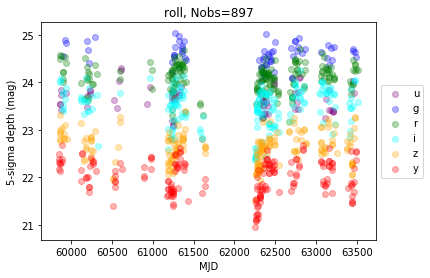

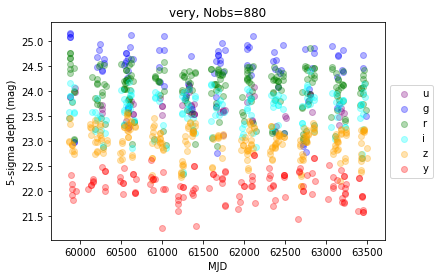

In [4]:
for i,filename in enumerate(filenames):
    conn = db.connect(filename)
    df = pd.read_sql('select * from summaryallprops;', conn)
    
    ang_dist = angularSeparation(df['fieldRA'].values, df['fieldDec'].values, ra, dec)
    overlapping = np.where(ang_dist < radius)[0]
    df_sub = df.iloc[overlapping, :]
    fig, ax = plt.subplots()
    for filtername in filter_colors:
        infilt = np.where(df_sub['filter'].values == filtername)
        ax.scatter(df_sub['observationStartMJD'].values[infilt],
                   df_sub['fiveSigmaDepth'].values[infilt],
                   c=filter_colors[filtername], label=filtername, alpha=0.3)
    title = filename.split('_')[0] + ', Nobs=%i' % df_sub.shape[0]
    ax.set(xlabel='MJD', ylabel='5-sigma depth (mag)', title=title)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    print(filename, df_sub.shape[0])
    fig.savefig('%i.pdf' % i)


In [5]:
# What do we see in this plot. Looks like 11 seasons (the survey probably starts part way through the 
# first season, and last one is cut off)

In [6]:
df_sub

,observationId,fieldRA,fieldDec,observationStartMJD,flush_by_mjd,visitExposureTime,filter,rotSkyPos,numExposures,airmass,...,rotTelPos,moonAz,sunAz,sunRA,sunDec,moonRA,moonDec,moonDistance,solarElong,moonPhase
3446,3446,22.227824,-39.693172,59858.174270,59858.200711,30.0,i,295.678515,1,1.038567,...,6.706186,280.805619,188.766622,3.343590,-0.086749,328.102082,-17.866741,51.308927,134.269328,73.009626
3481,3481,22.227824,-39.693172,59858.190922,59858.200711,30.0,r,295.678515,1,1.022795,...,22.693726,277.070167,178.331759,3.343854,-0.086860,328.265713,-17.763289,51.246854,134.266061,73.102987
8766,8766,20.137201,-39.417192,59864.238455,59864.266291,30.0,z,52.679770,1,1.039757,...,6.944026,11.724001,151.799932,3.440563,-0.126986,44.925795,18.081492,61.988238,133.223987,83.813105
8801,8801,20.137201,-39.417192,59864.253536,59864.266291,30.0,z,52.679770,1,1.062079,...,16.109384,5.121058,144.744987,3.440805,-0.127085,45.035937,18.155933,62.095937,133.219094,83.753220
11956,11956,18.056410,-40.363480,59868.112553,59868.144671,30.0,r,288.547685,1,1.075719,...,1.955890,70.428777,217.469281,3.503198,-0.152166,96.390781,27.798453,99.540596,130.856475,59.268097
11991,11991,18.056410,-40.363480,59868.129266,59868.144671,30.0,i,288.547685,1,1.048313,...,11.386904,68.153217,210.176228,3.503470,-0.152273,96.629556,27.838201,99.726466,130.849598,59.160454
12020,12020,18.401913,-41.106362,59868.143756,59868.178391,30.0,g,311.166745,1,1.034849,...,1.588623,66.097289,203.132393,3.503705,-0.152366,96.829291,27.872854,100.005804,130.116917,59.070774
12021,12021,20.949283,-38.652729,59868.144189,59868.178391,30.0,g,298.127235,1,1.035001,...,1.577376,66.034607,202.910816,3.503712,-0.152369,96.835159,27.873893,97.104222,132.616787,59.068145
12055,12055,18.401913,-41.106362,59868.160373,59868.178391,30.0,r,311.166745,1,1.022782,...,20.441538,63.625614,194.469076,3.503975,-0.152473,97.049999,27.912459,100.178311,130.110178,58.972101
12056,12056,20.949283,-38.652729,59868.160828,59868.178391,30.0,r,298.127235,1,1.019460,...,17.735820,63.555836,194.228132,3.503982,-0.152476,97.055916,27.913534,97.278824,132.610708,58.969462


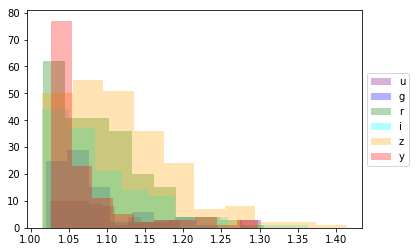

In [7]:
fig, ax = plt.subplots()
for filtername in filter_colors:
    infilt = np.where(df_sub['filter'].values == filtername)
    ack = ax.hist(df_sub['airmass'].values[infilt], color=filter_colors[filtername], alpha=.3, label=filtername) 
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))